In [4]:
library(readxl)

hawaii <- read_excel('../data/hawaii-5-11-22.xls', sheet = 'Complete')

Warning message:
"Expecting logical in W1463 / R1463C23: got 'HISTORICAL [21288]'"
Warning message:
"Expecting logical in W1464 / R1464C23: got 'HISTORICAL [21288]'"
Warning message:
"Expecting logical in W1465 / R1465C23: got 'HISTORICAL [21288]'"
Warning message:
"Expecting logical in W1466 / R1466C23: got 'HISTORICAL [21288]'"
Warning message:
"Expecting logical in W1467 / R1467C23: got 'HISTORICAL [21288]'"
Warning message:
"Expecting logical in W1468 / R1468C23: got 'HISTORICAL [21288]'"
Warning message:
"Expecting logical in W1469 / R1469C23: got 'HISTORICAL [21288]'"
Warning message:
"Expecting logical in W1470 / R1470C23: got 'HISTORICAL [21288]'"
Warning message:
"Expecting logical in W1471 / R1471C23: got 'HISTORICAL [21288]'"
Warning message:
"Expecting logical in W1472 / R1472C23: got 'HISTORICAL [21288]'"
Warning message:
"Expecting logical in W1473 / R1473C23: got 'HISTORICAL [21288]'"
Warning message:
"Expecting logical in W1474 / R1474C23: got 'HISTORICAL [21288]'"
Warn

In [146]:
library(tidyverse)

numerical_data <- hawaii %>% select_if(is.numeric) # Filter out non-numerical fields
primaries <- select(numerical_data,
    "ISLAND",
    "VOLCANO",
    # Major Elements
    "SIO2(WT%)",
    "TIO2(WT%)", 
    "AL2O3(WT%)", 
    "FeO*", 
    "CAO(WT%)", 
    "MGO(WT%)", 
    "K2O(WT%)", 
    "NA2O(WT%)",
    # Minor Elements
    # "P2O5(WT%)",
    # "MNO(WT%)", 
)

# Filter out data with missing values
data <- primaries[complete.cases(primaries), ]
sprintf('Number of samples: %s', nrow(data))

[1] "Number of samples: 2909"

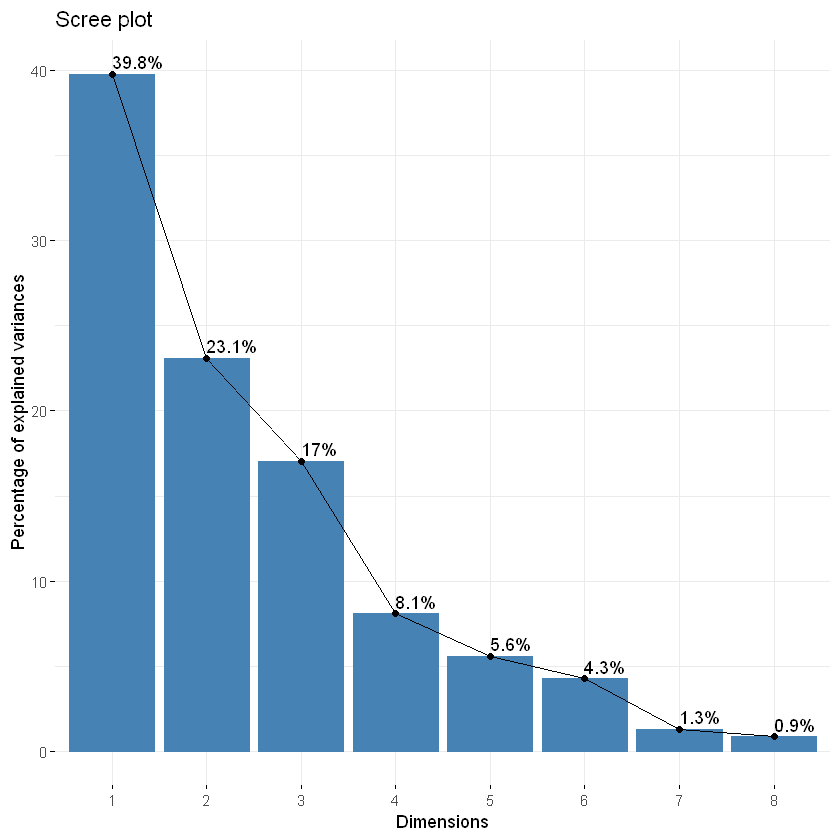

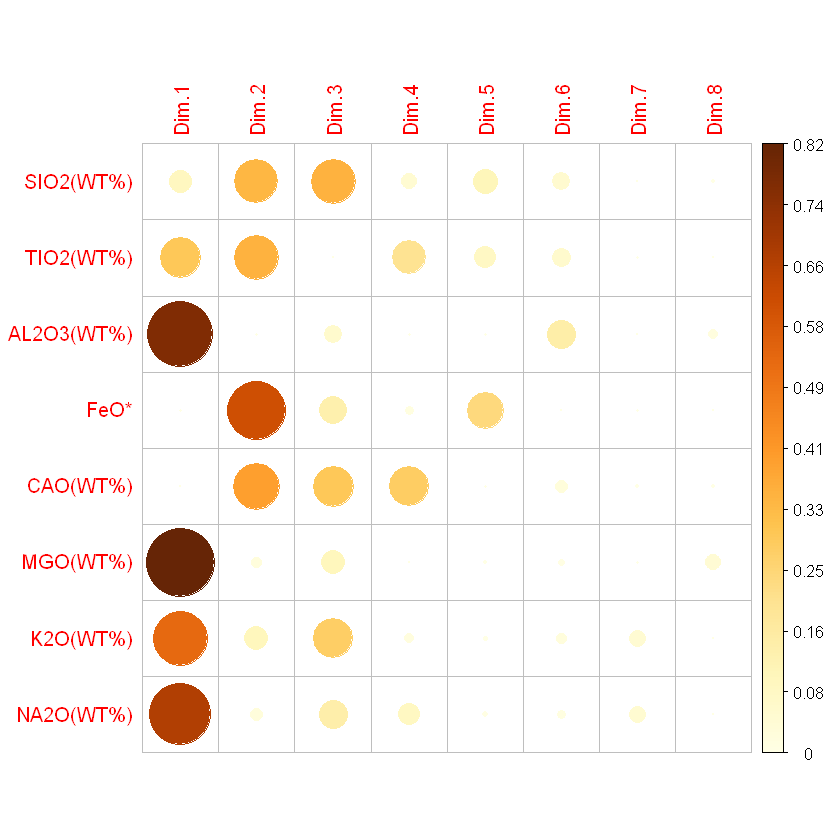

In [147]:
library(factoextra)
library(corrplot)

pca <- prcomp(data[, c(-1, -2)], scale = TRUE)
var <- get_pca_var(pca)

fviz_eig(pca, addlabels = TRUE)
corrplot(var$cos2, is.corr=FALSE)


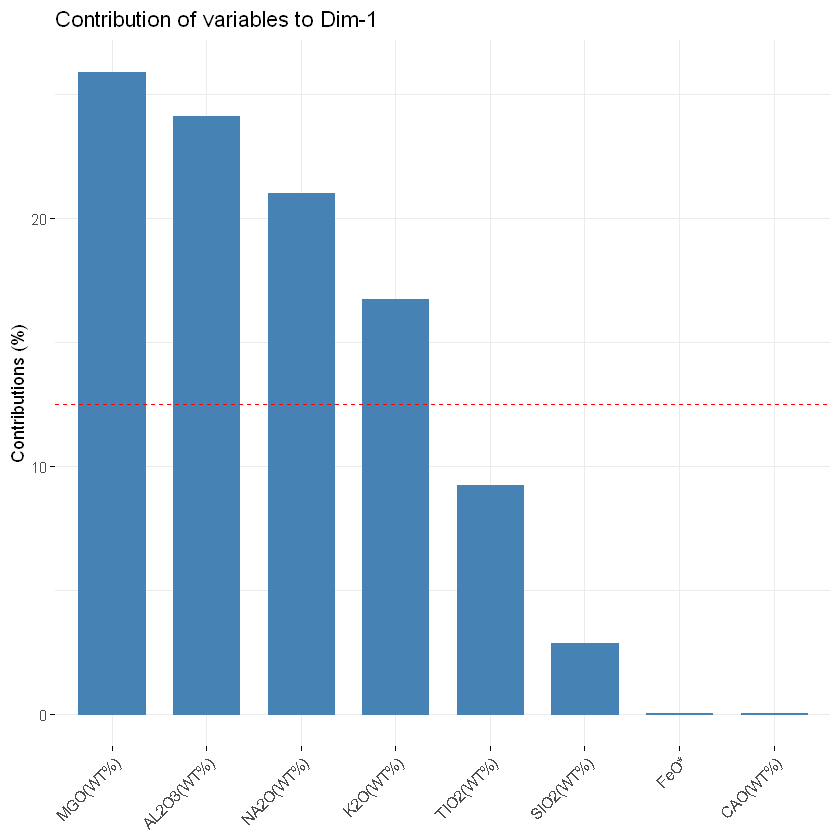

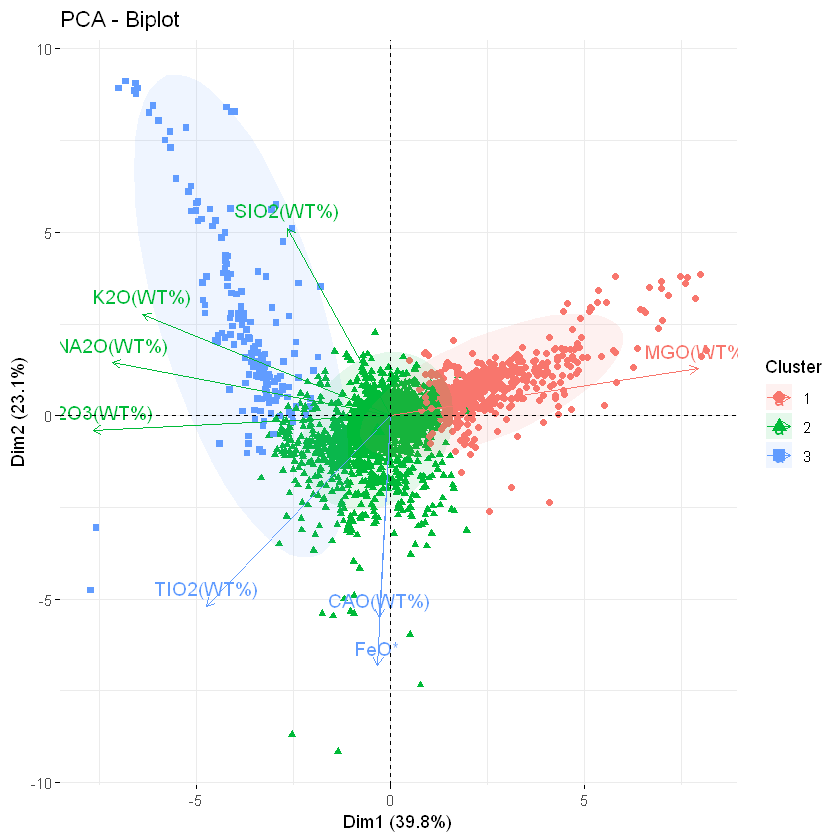

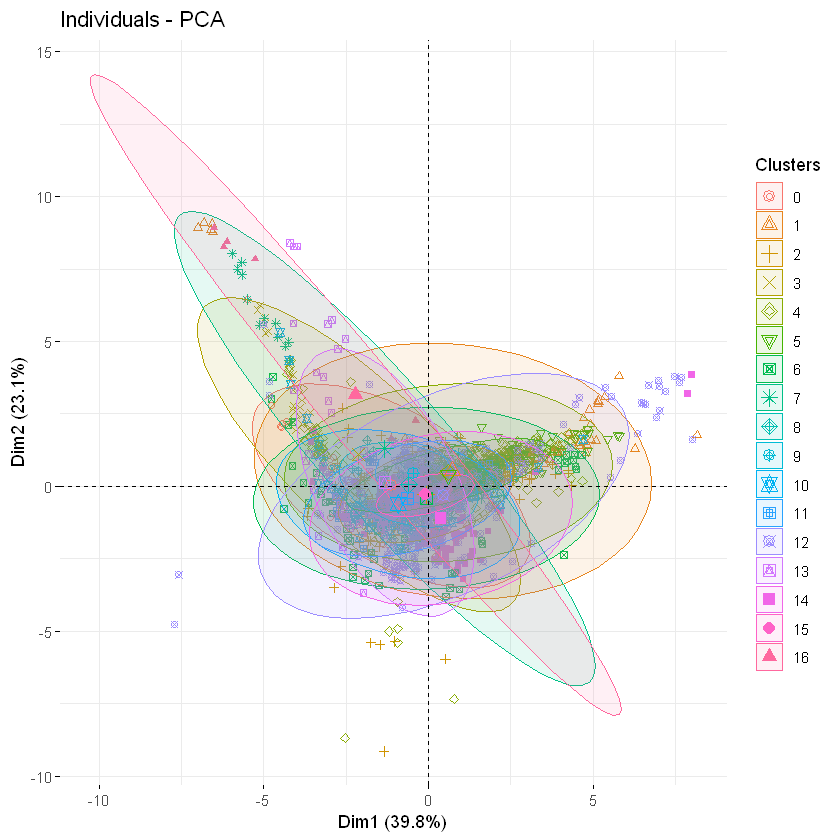

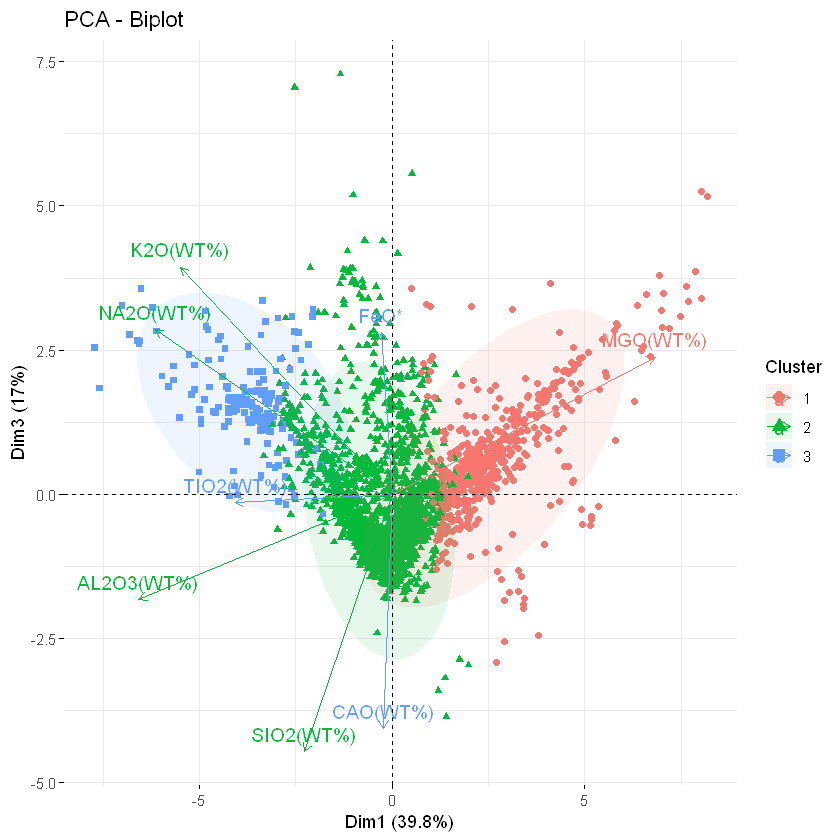

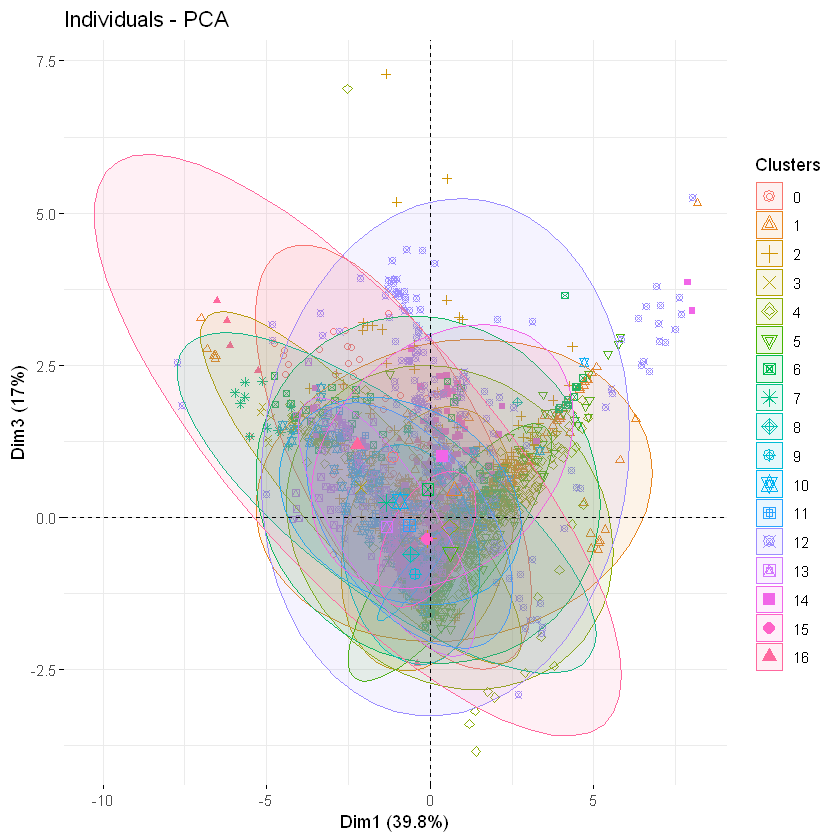

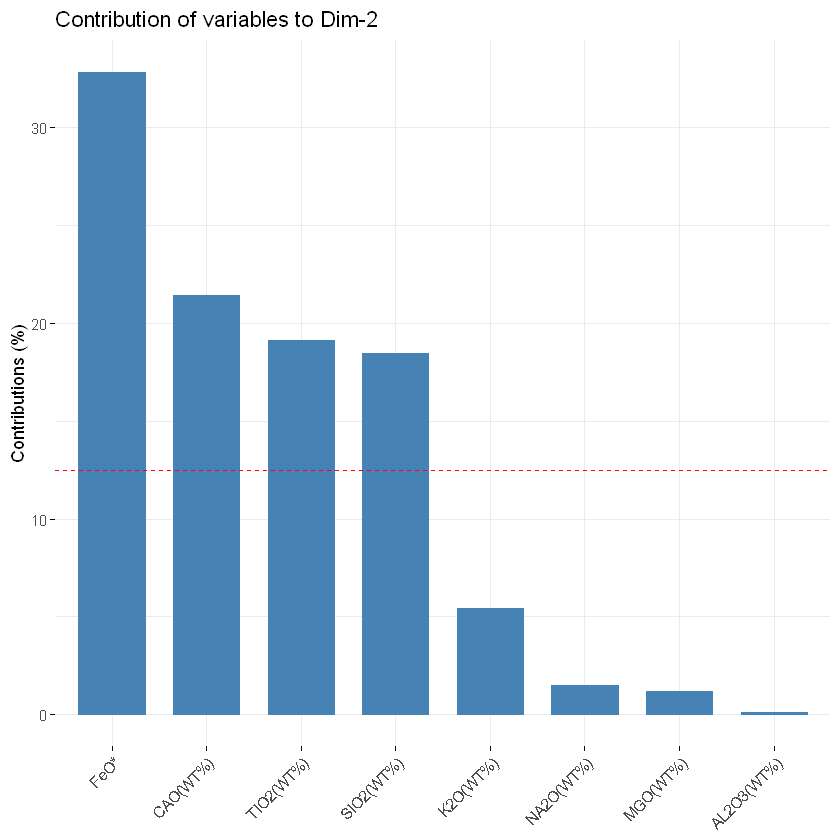

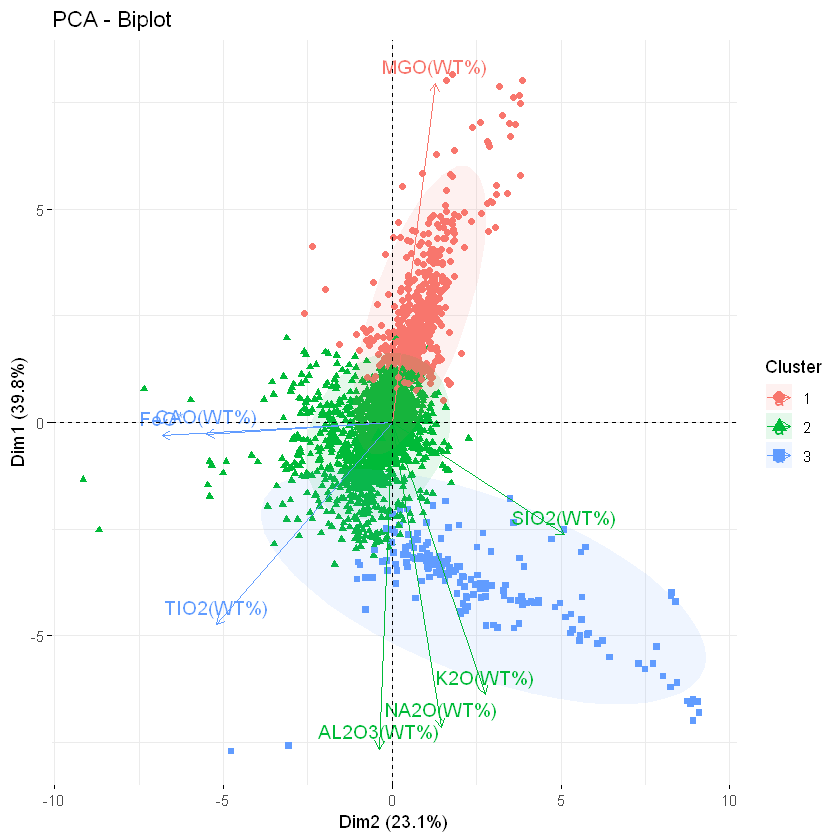

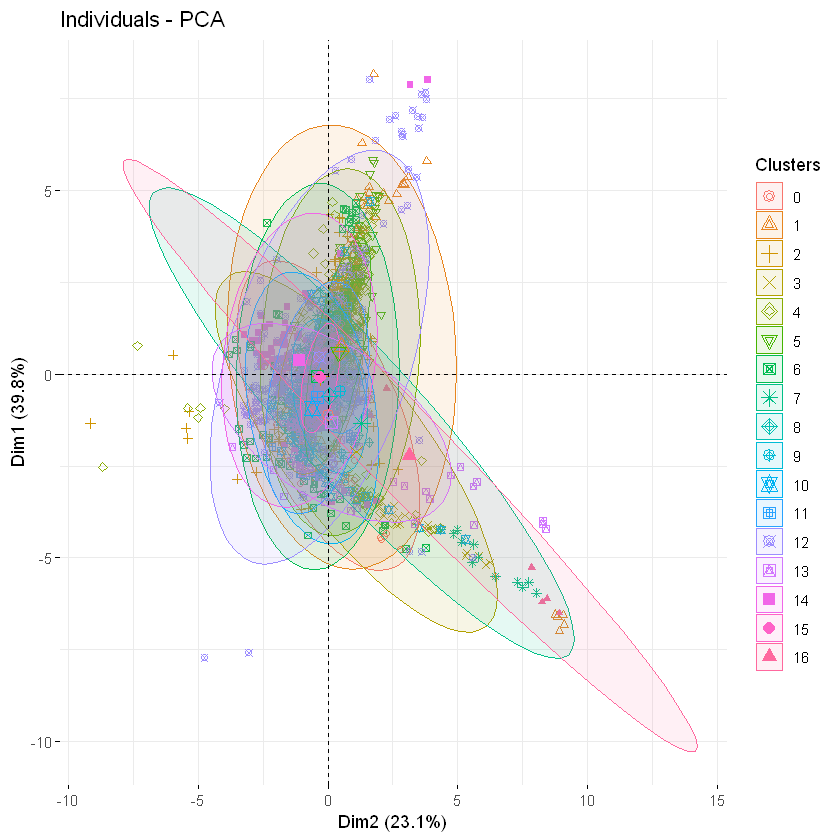

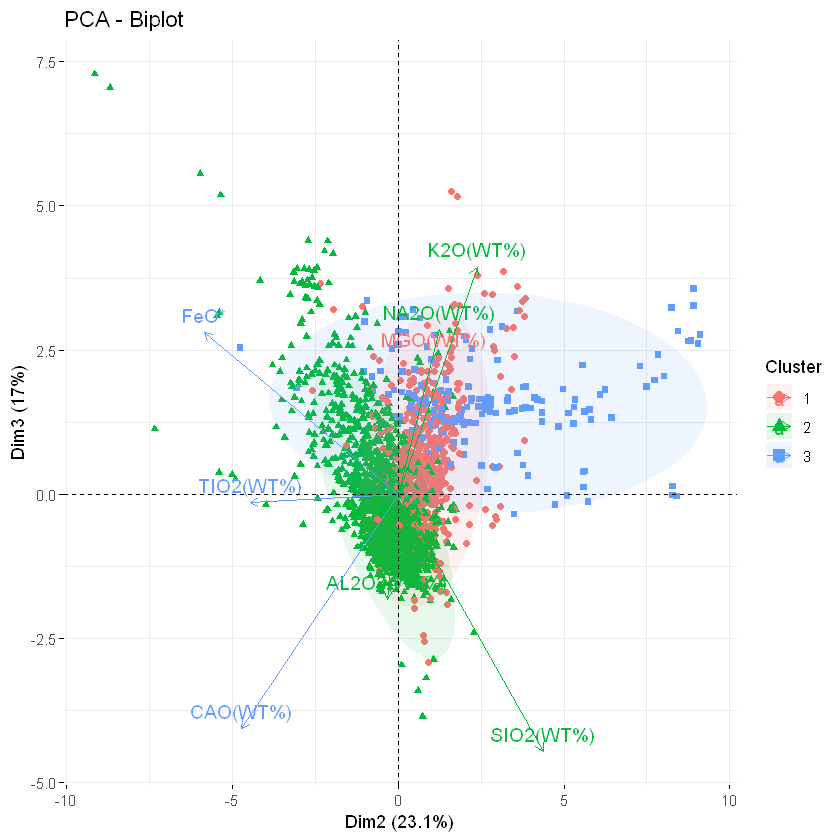

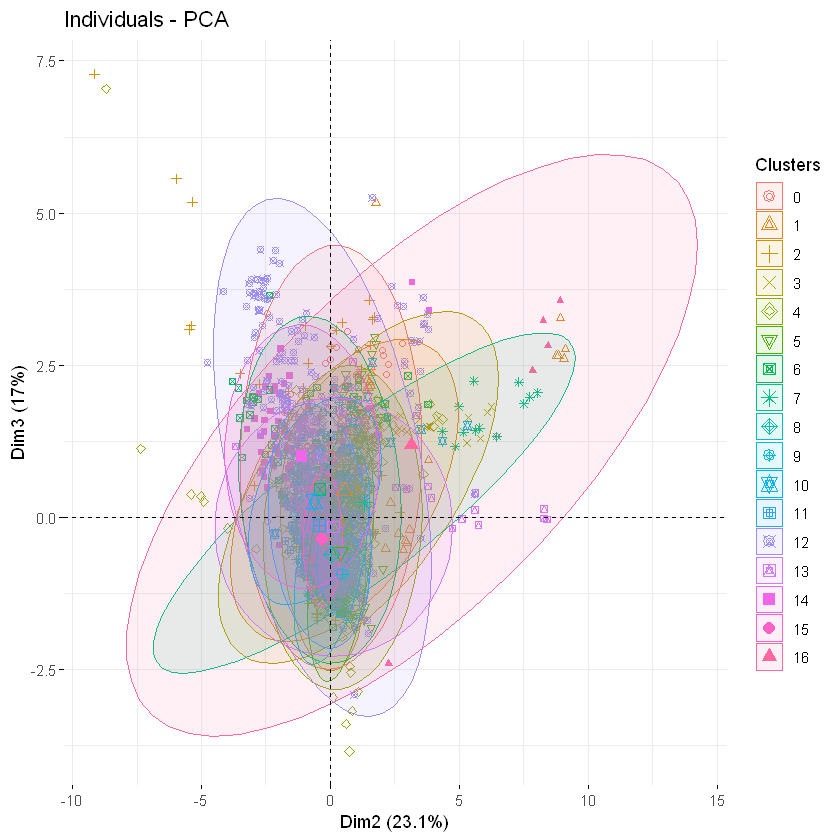

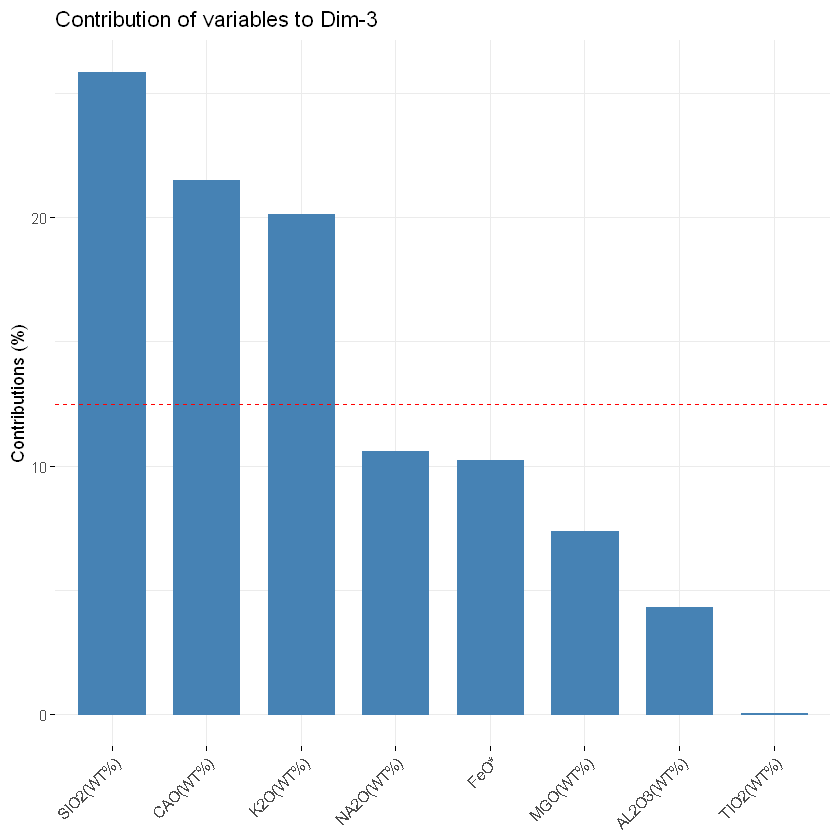

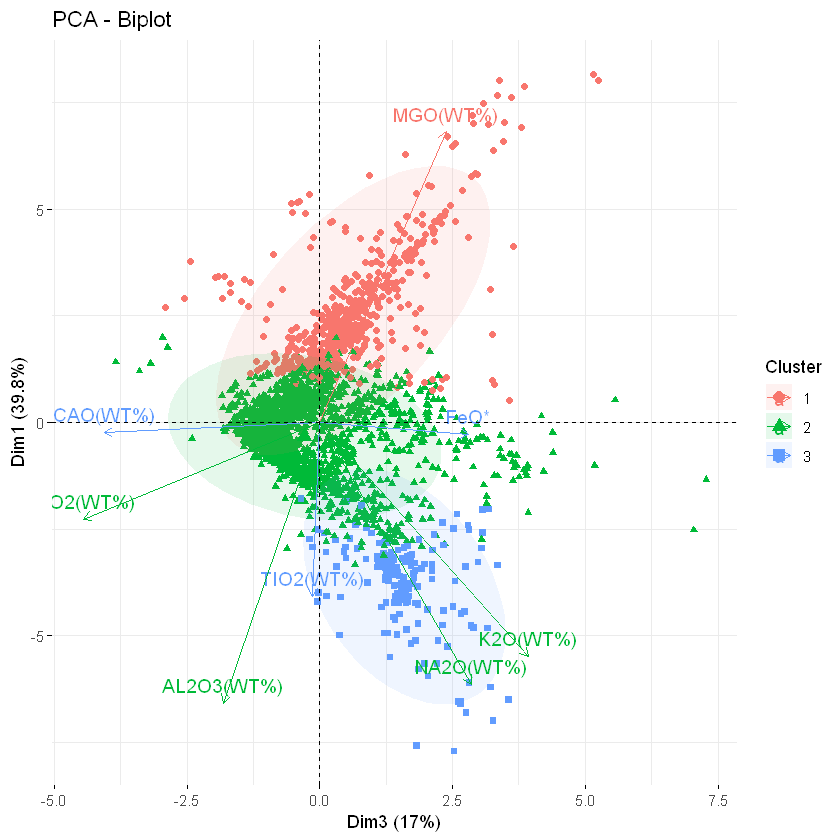

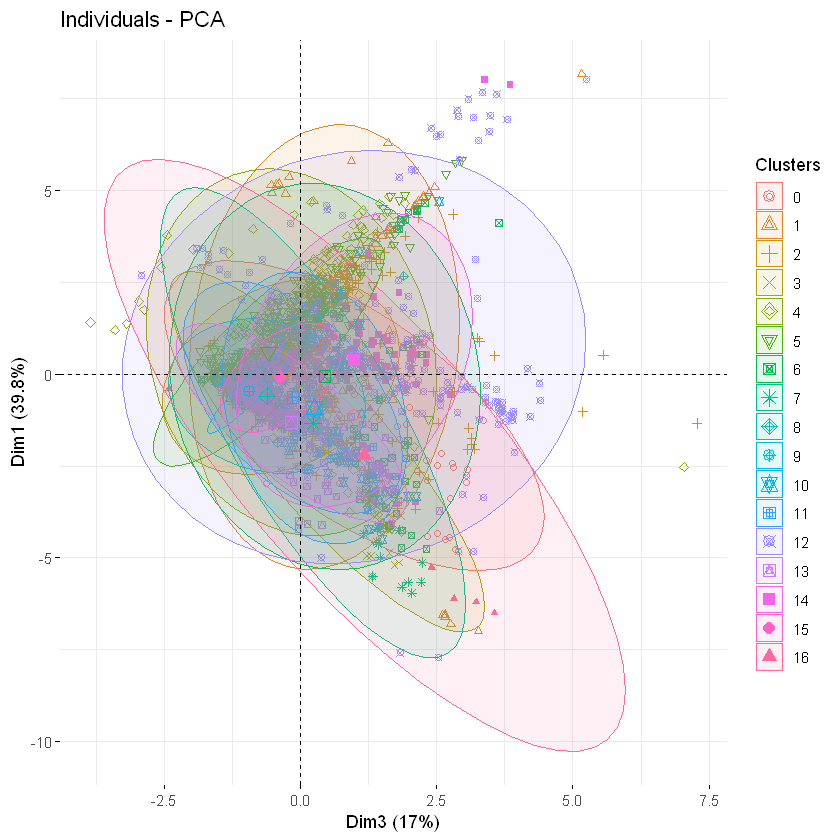

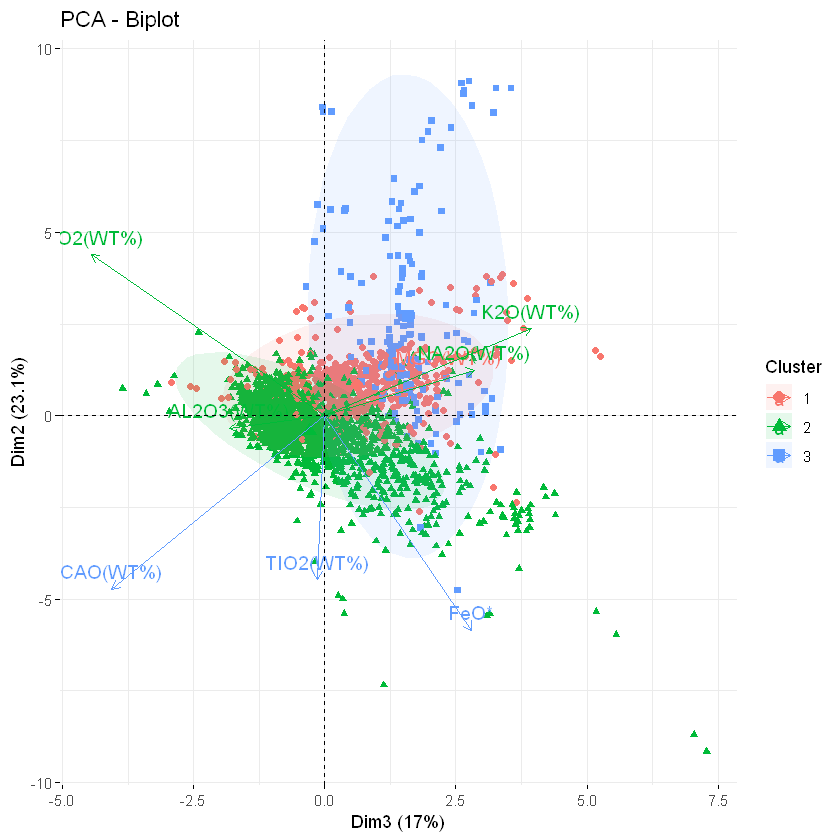

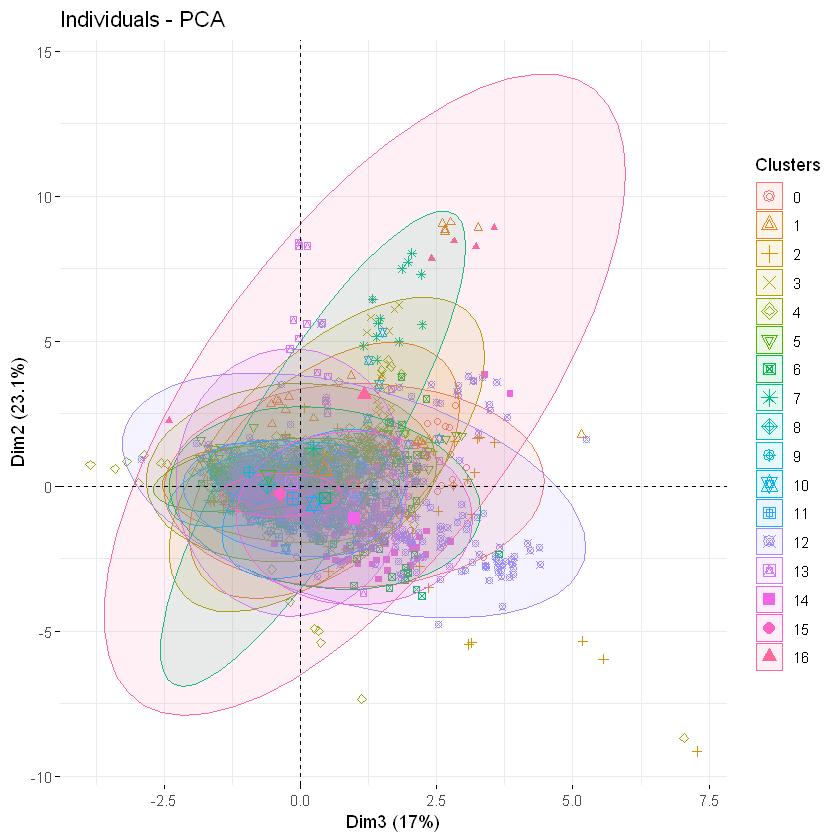

In [150]:
dim <- 3

set.seed(123)
ind <- get_pca_ind(pca)
km_var <- kmeans(var$coord, centers = dim, nstart = 25)
km_ind <- kmeans(ind$coord, centers = dim, nstart = 25)
km_var.grp <- as.factor(km_var$cluster)
km_ind.grp <- as.factor(km_ind$cluster)

for (i in 1:dim) {

  print(fviz_contrib(pca, choice = "var", axes = i, top = 10))

  for (k in 1:dim) {
    if (k == i) {
      next
    }
    # print(fviz_pca_var(
    #   pca, 
    #   col.var = 'cos2', 
    #   gradient.cols = c('#00AFBB', '#E7B800', '#FC4E07'), 
    #   repel = TRUE,
    #   axes = c(i, k)
    # ))

    print(fviz_pca(pca, 
      col.ind = km_ind.grp,
      col.var = km_var.grp,
      geom.ind = "point", 
      addEllipses = TRUE, 
      legend.title = "Cluster",
      axes = c(i, k)
    ))

    print(fviz_pca_ind(
        pca,
        geom.ind = 'point',
        col.ind = factor(data$VOLCANO),
        addEllipses = TRUE,
        legend.title = 'Clusters',
        axes = c(i, k)
    ))
  }
}

In [ ]:
set.seed(123)
ind <- get_pca_ind(pca)
km_var <- kmeans(var$coord, centers = dim, nstart = 25)
km_ind <- kmeans(ind$coord, centers = dim, nstart = 25)
km_var.grp <- as.factor(km_var$cluster)
km_ind.grp <- as.factor(km_ind$cluster)

fviz_pca(pca, 
    col.ind = km_ind.grp,
    col.var = km_var.grp,
    geom.ind = "point", 
    addEllipses = TRUE, 
    legend.title = "Cluster",
)

fviz_pca_ind(
    pca,
    geom.ind = 'point',
    col.ind = factor(data$VOLCANO),
    addEllipses = TRUE,
    legend.title = 'Clusters'
)

# fviz_pca_var(
#     pca,
#     col.var = grp,
#     palette = c("#0073C2FF", "#EFC000FF", "#868686FF", "#9AD4D6", "#F2B8B8"),
#     legend.title = 'Cluster'
# )
# fviz_pca(
#     pca,
#     geom.ind = 'point',
#     col.var = grp,
#     col.ind = 'black',
#     palette = c("#0073C2FF", "#EFC000FF", "#868686FF", "#9AD4D6", "#F2B8B8"),
# )
# fviz_cluster(
#     km,
#     data = ind$coord,
#     geom = "point",
#     ellipse.type = "euclid",
# )